In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
class real:
    def __init__(self, value):
        if isinstance(value, real):
            self.value = value.value
        else:
            self.value = float(value)

    def __add__(self, other):
        return real(self.value + float(other))

    def __sub__(self, other):
        return real(self.value - float(other))

    def __mul__(self, other):
        return real(self.value * float(other))

    def __truediv__(self, other):
        return real(self.value / float(other))

    def __pow__(self, other):
        return real(self.value ** float(other))

    def __neg__(self):
        return real(-self.value)

    def __float__(self):
        return self.value

    def __eq__(self, other):
        return self.value == float(other)

    def __repr__(self):
        return f"real({self.value})"

    def __str__(self):
        return str(self.value)

In [3]:
num1 = real(10 + 67 / 3 + math.sqrt(3))

In [4]:
print(num1)

34.065384140902204


In [5]:
num2 = real(5*math.pi + 2*math.e - 3) + num1

In [6]:
print(num2)

52.20991106576926


In [7]:
num2 -= num1

In [8]:
print(num2)

18.14452692486706


In [9]:
print(num1 * num2)

618.1002797505394


In [10]:
print(num1 ** num2)  # This will raise an error since ** is not defined for the real class

6.354768873932069e+27


In [11]:
print(num1 ** real(math.sqrt(2)))  # This will also raise an error since ** is not defined for the real class

146.89879639821362


In [12]:
# The code above defines a class `real` to handle real numbers and performs some arithmetic operations.
# It creates two instances of `real`, performs addition and subtraction, and prints the results.

In [54]:
class Complex:
    def __init__(self, real_part, imag_part):
        self.real = real(real_part)
        self.imag = real(imag_part)

    def __add__(self, other):
        if isinstance(other, Complex):
            return Complex(self.real + other.real, self.imag + other.imag)
        elif isinstance(other, real):
            return Complex(self.real + other, self.imag)
        elif isinstance(other, (int, float)):
            return Complex(self.real + other, self.imag)
        else:
            raise TypeError(f"Unsupported operand type(s) for +: 'Complex' and '{type(other).__name__}'")
    def __sub__(self, other):
        if isinstance(other, Complex):
            return Complex(self.real - other.real, self.imag - other.imag)
        return Complex(self.real - other, self.imag)

    def __mul__(self, other):
        if isinstance(other, Complex):
            return Complex(self.real * other.real - self.imag * other.imag,
                       self.real * other.imag + self.imag * other.real)
        elif isinstance(other, (int, float, real)):
            return Complex(self.real * other, self.imag * other)
        else:
            return NotImplemented

    def __truediv__(self, other):
        if isinstance(other, Complex):
            denom = other.real.value ** 2 + other.imag.value ** 2
            if denom == 0:
                raise ZeroDivisionError("Division by zero in complex division.")
            return Complex((self.real * other.real + self.imag * other.imag) / denom,
                           (self.imag * other.real - self.real * other.imag) / denom)
        return Complex(self.real / other, self.imag / other)

    def __pow__(self, exponent):
    # Accept real numbers, wrap into Complex
        if isinstance(exponent, (int, float, real)):
            exponent = Complex(exponent, 0)

        if not isinstance(exponent, Complex):
            raise TypeError("Exponent must be int, float, real, or Complex")

        # Handle 0^anything safely
        if self.real.value == 0 and self.imag.value == 0:
            return Complex(0, 0)

        # Convert self to polar form
        r = abs(self)                            # magnitude
        theta = self.phase()                     # angle

        # exponent = a + bi
        a = exponent.real.value
        b = exponent.imag.value

        # Using: z^w = e^{w * ln(z)} = r^a * e^{-bθ} * [cos(aθ + b ln r) + i sin(aθ + b ln r)]
        log_r = math.log(r)
        new_mag = r ** a * math.exp(-b * theta)
        new_angle = a * theta + b * log_r

        return Complex(new_mag * math.cos(new_angle),
                   new_mag * math.sin(new_angle))

    def __neg__(self):
        return Complex(-self.real, -self.imag)

    def __abs__(self):
        return math.hypot(self.real.value, self.imag.value)

    def conjugate(self):
        return Complex(self.real, -self.imag)

    def phase(self):
        return math.atan2(self.imag.value, self.real.value)

    def polar(self):
        return (abs(self), self.phase())

    def __eq__(self, other):
        return self.real == other.real and self.imag == other.imag

    def __ne__(self, other):
        return not self.__eq__(other)

    def __lt__(self, other):
        return abs(self) < abs(other)

    def __le__(self, other):
        return abs(self) <= abs(other)

    def __gt__(self, other):
        return abs(self) > abs(other)

    def __ge__(self, other):
        return abs(self) >= abs(other)

    def __bool__(self):
        return bool(self.real.value or self.imag.value)

    def __hash__(self):
        return hash((self.real.value, self.imag.value))

    def __str__(self):
        r, i = self.real.value, self.imag.value
        sign = '+' if i >= 0 else '-'
        return f"{r} {sign} {abs(i)}i"

    def __repr__(self):
        return self.__str__()
    def __rmul__(self, other):
        return self.__mul__(other)
    def __radd__(self, other):
        return self + other

    def __rsub__(self, other):
        return -self + other

    def __rtruediv__(self, other):
        return Complex(other, 0) / self
    def plot(self, color='blue', label=None):
        plt.figure(figsize=(6, 6))
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)

        plt.plot(self.real.value, self.imag.value, 'o', color=color, label=label or str(self))
        plt.xlabel("Real")
        plt.ylabel("Imaginary")
        plt.title("Argand Plane")
        plt.grid(True)
        plt.legend()
        plt.gca().set_aspect('equal')
        plt.show()
    @classmethod
    def plot_many(cls, numbers, colors=None, labels=None):
        plt.figure(figsize=(6, 6))
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)

        for i, num in enumerate(numbers):
            color = colors[i] if colors else 'blue'
            label = labels[i] if labels else str(num)
            plt.plot(num.real.value, num.imag.value, 'o', color=color, label=label)

        plt.xlabel("Real")
        plt.ylabel("Imaginary")
        plt.title("Argand Plane (Multiple Points)")
        plt.grid(True)
        plt.legend()
        plt.gca().set_aspect('equal')
        plt.show()



In [31]:
c1 = Complex(1, 2)
c2 = Complex(3, 4)

In [32]:
c1 = Complex(3, 4)
c2 = Complex(1, 2)
print(c1 + c2)          # → Complex(real(4.0), real(6.0))
print(str(c1 + c2))     # → 4.0 + 6.0i


4.0 + 6.0i
4.0 + 6.0i


In [33]:
c3 = Complex(2*math.pi, 67/3 + math.sqrt(3))

In [34]:
c4 = Complex(4*1/math.pow(2 , 1/5) , 7 )

In [35]:
print(c3 + c4)

9.765387560364083 + 31.06538414090221i


In [36]:
print(c3 - c4)
print(c3 * c4)
print(c3 / c4)
print(c3 ** c4)  # This will raise an error since ** is not defined for the Complex class
print(c3 == c4)

2.8009830539950897 + 17.06538414090221i
-146.578366952479 + 127.78283202945724i
3.1138606137807736 + 0.6514153054614691i
-2.648812263691121 + 6.76476769299523i
False


In [37]:
polar_c3 = c3.polar()
polar_c4 = c4.polar()


In [38]:
print(polar_c3)

(24.872095437528884, 1.3154093410876935)


In [39]:
print(polar_c4)

(7.818294733001768, 1.1091848139292468)


In [40]:
print(c3.conjugate())

6.283185307179586 - 24.06538414090221i


In [41]:
i = Complex(0, 1)  # Define the imaginary unit i
c5 = Complex(math.e , 0) ** (i * math.pi / 2) 

In [42]:
print(c5)

6.123233995736766e-17 + 1.0i


In [43]:
print(c5 + Complex(1, 0)) 

1.0 + 1.0i


In [44]:
print(Complex(0, 0).polar()) 

(0.0, 0.0)


#### Full test of Complex class functionality

In [45]:
print("\n===== BASIC OPERATIONS =====")
a = Complex(2, 3)
b = Complex(1, -4)
print(f"a = {a}")  # 2 + 3i
print(f"b = {b}")  # 1 - 4i
print("a + b =", a + b)       # 3 - 1i
print("a - b =", a - b)       # 1 + 7i
print("a * b =", a * b)       # 14 - 5i
print("a / b =", a / b)       # proper division
print("Conjugate of a:", a.conjugate())  # 2 - 3i

print("\n===== REVERSE OPERATIONS =====")
print("5 + a =", 5 + a)       # 7 + 3i
print("a + 5 =", a + 5)       # 7 + 3i
print("3 * a =", 3 * a)       # 6 + 9i
print("a * 3 =", a * 3)       # 6 + 9i
print("10 - a =", 10 - a)     # 8 - 3i
print("a - 10 =", a - 10)     # -8 + 3i
print("10 / a =", 10 / a)     # ~1.3846 - 2.0769i
print("a / 10 =", a / 10)     # 0.2 + 0.3i

print("\n===== EXPONENTIATION =====")
print("a ** 2 =", a ** 2)     # Square of a
print("a ** 0.5 =", a ** 0.5) # Square root of a
print("e^(i * π) =", Complex(math.e, 0) ** (Complex(0, 1) * math.pi))  # Should be -1 + 0i
print("e^(i * π/2) =", Complex(math.e, 0) ** (Complex(0, 1) * math.pi / 2))  # ~0 + 1i

print("\n===== MAGNITUDE, PHASE & POLAR =====")
print("|a| =", abs(a))              # sqrt(13)
print("Phase of a =", a.phase())   # atan2(3,2)
print("Polar of a =", a.polar())  # (|a|, phase)

print("\n===== COMPARISON =====")
x = Complex(1, 1)
y = Complex(2, 2)
print("x == y:", x == y)           # False
print("x != y:", x != y)           # True
print("x < y:", x < y)             # True
print("x <= y:", x <= y)           # True
print("x > y:", x > y)             # False
print("x >= y:", x >= y)           # False

print("\n===== BOOL AND HASH =====")
print("bool(Complex(0, 0)):", bool(Complex(0, 0)))   # False
print("bool(Complex(1, 0)):", bool(Complex(1, 0)))   # True
print("hash(Complex(1, 2)):", hash(Complex(1, 2)))   # should work

print("\n===== STR & REPR =====")
print("str(a):", str(a))
print("repr(a):", repr(a))

print("\n===== TYPE SAFETY =====")
try:
    print("a + 'hello' =", a + 'hello')  # should raise TypeError
except TypeError as e:
    print("Caught expected error:", e)

try:
    print("Complex(0, 0) ** Complex(0, 0):", Complex(0, 0) ** Complex(0, 0))  # 0 ** 0
except ValueError as e:
    print("Caught expected error:", e)



===== BASIC OPERATIONS =====
a = 2.0 + 3.0i
b = 1.0 - 4.0i
a + b = 3.0 - 1.0i
a - b = 1.0 + 7.0i
a * b = 14.0 - 5.0i
a / b = -0.5882352941176471 + 0.6470588235294118i
Conjugate of a: 2.0 - 3.0i

===== REVERSE OPERATIONS =====
5 + a = 7.0 + 3.0i
a + 5 = 7.0 + 3.0i
3 * a = 6.0 + 9.0i
a * 3 = 6.0 + 9.0i
10 - a = 8.0 - 3.0i
a - 10 = -8.0 + 3.0i
10 / a = 1.5384615384615385 - 2.3076923076923075i
a / 10 = 0.2 + 0.3i

===== EXPONENTIATION =====
a ** 2 = -4.999999999999999 + 11.999999999999998i
a ** 0.5 = 1.6741492280355401 + 0.895977476129838i
e^(i * π) = -1.0 + 1.2246467991473532e-16i
e^(i * π/2) = 6.123233995736766e-17 + 1.0i

===== MAGNITUDE, PHASE & POLAR =====
|a| = 3.605551275463989
Phase of a = 0.982793723247329
Polar of a = (3.605551275463989, 0.982793723247329)

===== COMPARISON =====
x == y: False
x != y: True
x < y: True
x <= y: True
x > y: False
x >= y: False

===== BOOL AND HASH =====
bool(Complex(0, 0)): False
bool(Complex(1, 0)): True
hash(Complex(1, 2)): -3550055125485641917



In [46]:
print(abs(Complex(3, 4)))  # Should print the magnitude of the complex number


5.0


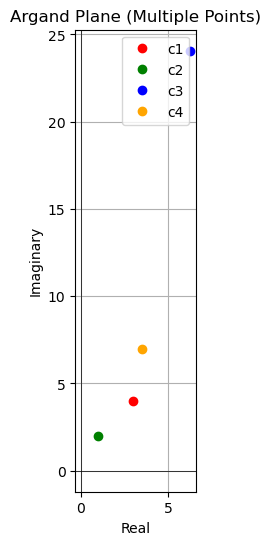

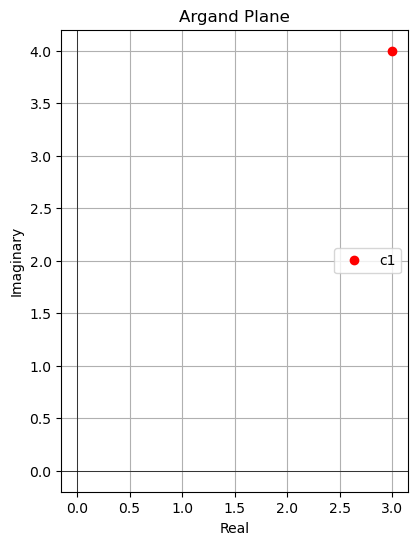

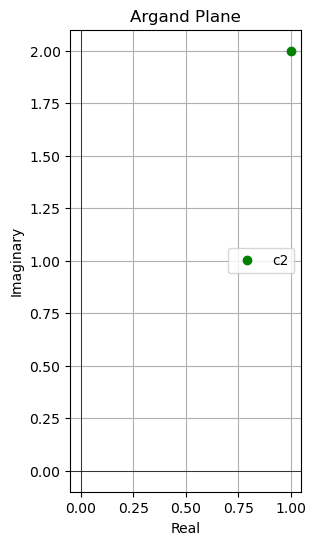

In [49]:
c1.plot_many([c1, c2, c3, c4], colors=['red', 'green', 'blue', 'orange'], labels=['c1', 'c2', 'c3', 'c4'])
c1.plot(color='red', label='c1')
c2.plot(color='green', label='c2')  

In [50]:
print(c1)

3.0 + 4.0i


In [51]:
print(c2)

1.0 + 2.0i


In [52]:
print(c3)

6.283185307179586 + 24.06538414090221i


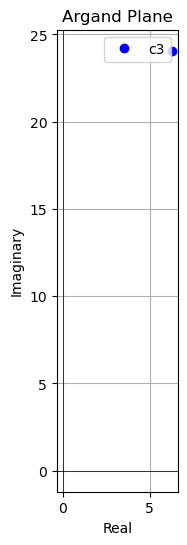

In [53]:
c3.plot(color='blue', label='c3')

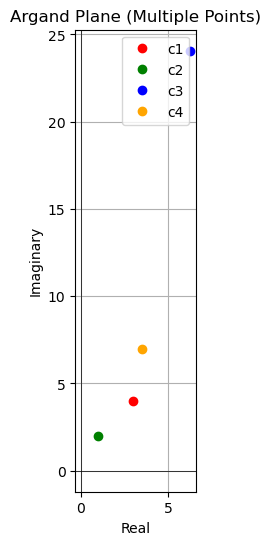

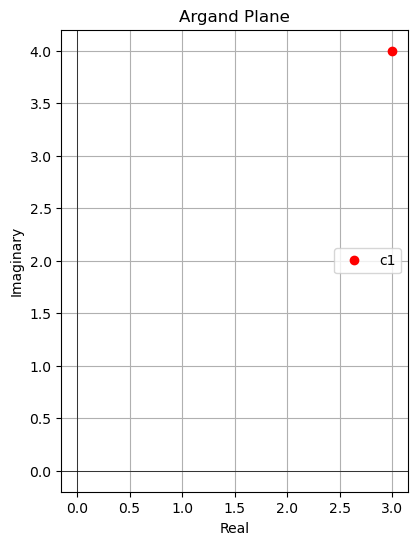

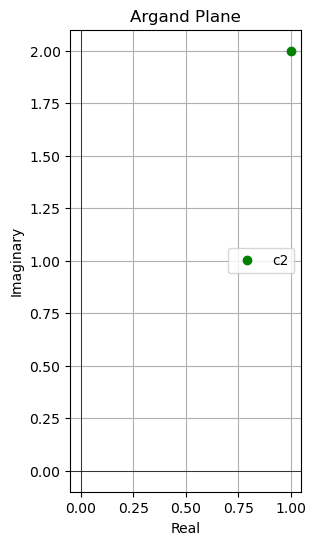

In [59]:
Complex.plot_many([c1, c2, c3, c4], colors=['red', 'green', 'blue', 'orange'], labels=['c1', 'c2', 'c3', 'c4'])
c1.plot(color='red', label='c1')
c2.plot(color='green', label='c2')  